<a href="https://colab.research.google.com/github/jmoranrun/HAR_Dist_ML/blob/main/Pruning_HAR_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NoteBook for Pruning Experiments Analysis
This notebook reads in the data files produced by the "Pruning Experiments around Edge Personalization" notebook. <br>
 Its used to run the analysis for this presentation.
Human Activity Recognition in a Distributed Machine Learning System. Jul 26, 2021  IEEE International Conference on Wearable and Implantable Body Sensor Networks (BSN2021)

In [ ]:
import tensorflow as tf
#tf.enable_eager_execution()

import tempfile
import zipfile
import os
import tensorboard
import numpy as np
import pandas as pd
import random 
import matplotlib.pyplot as plt
import ast

from google.colab import drive
drive.mount('/content/drive')

plt.rcParams.update({'font.size': 14})


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Function to convert the results read in from files to numpy array wih correct dimension
def convert_strings(str_in):
  str_in = str_in.rstrip("\n")
  str_in = str_in.replace('[', '') 
  str_in = str_in.replace(']', '') 
  str_in = str_in.split(',')
  [float(i) for i in str_in]
  str_in = np.asarray(str_in)
  str_in = str_in.astype(np.float)
  str_in = np.reshape(str_in,(num_runs_per_edge_ratio, len(edge_central_ratio_lst)))
  return str_in


[0.00286512 0.00235704 0.00421606 0.00436471 0.00167932]


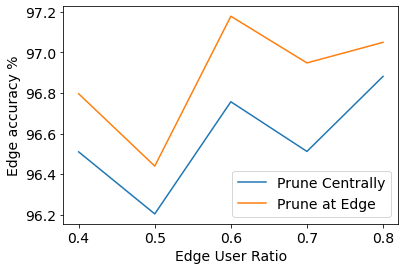

[0.00286512 0.00235704 0.00421606 0.00436471 0.00167932]
0.30964501999999783
0.00010940994306888099


In [ ]:
with open('/content/drive/My Drive/pet_pcf_tet_bl.txt', 'r') as f:
  pet_pcf_tet=f.readlines()

with open('/content/drive/My Drive/pef_pct_tet_bl.txt', 'r') as f:
  pef_pct_tet=f.readlines()

num_runs_per_edge_ratio=10
edge_central_ratio_lst = [0.4, 0.5, 0.6, 0.7, 0.8]

pet_pcf_tet_edge = pet_pcf_tet[1]
pet_pcf_tet_edge = convert_strings(pet_pcf_tet_edge) 

pet_pcf_tet_central  = pet_pcf_tet[0]
pet_pcf_tet_central = convert_strings(pet_pcf_tet_central) 

pet_pcf_tet_edge=np.mean(pet_pcf_tet_edge, axis=0)
pet_pcf_tet_central=np.mean(pet_pcf_tet_central, axis=0)


pef_pct_tet_edge = pef_pct_tet[1]
pef_pct_tet_edge = convert_strings(pef_pct_tet_edge) 

pef_pct_tet_central  = pef_pct_tet[0]
pef_pct_tet_central = convert_strings(pef_pct_tet_central) 


pef_pct_tet_edge=np.mean(pef_pct_tet_edge, axis=0)
pef_pct_tet_central=np.mean(pef_pct_tet_central, axis=0)


delta =  pef_pct_tet_edge-pet_pcf_tet_edge
print(delta)
mean_delta = np.mean(delta)
var_delta = np.var(delta)

plt.plot(edge_central_ratio_lst, 100*pet_pcf_tet_edge, label='Prune Centrally')
plt.plot(edge_central_ratio_lst, 100*pef_pct_tet_edge, label='Prune at Edge')
x_pos = 2
y_pos = 96.3
mean_delta=100*mean_delta
#plt.text(x_pos, y_pos, 'Mean of delta is %.2f' %mean_delta)
#y_pos = 96.45
#plt.text(x_pos, y_pos, "Var of delta is %.5f" % var_delta)
plt.rcParams.update({'font.size': 14})
plt.xlabel("Edge User Ratio")
plt.xticks(edge_central_ratio_lst)
plt.ylabel("Edge accuracy %")

plt.legend()
plt.show()

delta =  pef_pct_tet_edge-pet_pcf_tet_edge
print(delta)
mean_delta = np.mean(delta)
var_delta = np.var(delta)

print(100*mean_delta)
print(100*var_delta)



[ 0.00094749  0.00144913 -0.00911079 -0.01712617 -0.01223769]


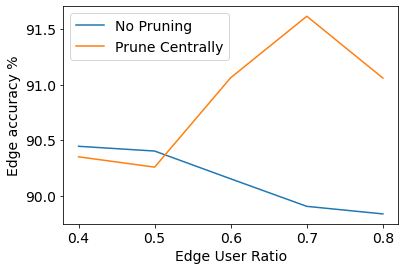

[ 0.00094749  0.00144913 -0.00911079 -0.01712617 -0.01223769]
-0.7215605599999964
0.00537492110927642


In [ ]:
with open('/content/drive/My Drive/pef_pcf_tef_bl.txt', 'r') as f:
  pef_pcf_tef=f.readlines()

with open('/content/drive/My Drive/pef_pct_tef_bl.txt', 'r') as f:
  pef_pct_tef=f.readlines()


num_runs_per_edge_ratio=10
edge_central_ratio_lst = [0.4, 0.5, 0.6, 0.7, 0.8]

pef_pcf_tef_edge = pef_pcf_tef[1]
pef_pcf_tef_edge = convert_strings(pef_pcf_tef_edge) 

pef_pcf_tef_central  = pef_pcf_tef[0]
pef_pcf_tef_central = convert_strings(pef_pcf_tef_central) 

pef_pcf_tef_edge=np.mean(pef_pcf_tef_edge, axis=0)
pef_pcf_tef_central=np.mean(pef_pcf_tef_central, axis=0)


pef_pct_tef_edge = pef_pct_tef[1]
pef_pct_tef_edge = convert_strings(pef_pct_tef_edge) 

pef_pct_tef_central  = pef_pct_tef[0]
pef_pct_tef_central = convert_strings(pef_pct_tef_central) 


pef_pct_tef_edge=np.mean(pef_pct_tef_edge, axis=0)
pef_pct_tef_central=np.mean(pef_pct_tef_central, axis=0)


delta =  pef_pcf_tef_edge-pef_pct_tef_edge
print(delta)
mean_delta = np.mean(delta)
var_delta = np.var(delta)

plt.plot(edge_central_ratio_lst, 100*pef_pcf_tef_edge, label='No Pruning')
plt.plot(edge_central_ratio_lst, 100*pef_pct_tef_edge, label='Prune Centrally')
x_pos = 2
y_pos = 96.3
mean_delta=100*mean_delta
#plt.text(x_pos, y_pos, 'Mean of delta is %.2f' %mean_delta)
#y_pos = 96.45
#plt.text(x_pos, y_pos, "Var of delta is %.5f" % var_delta)
plt.ylabel("Edge accuracy %")
plt.xlabel("Edge User Ratio")
plt.xticks(edge_central_ratio_lst)
plt.legend()
plt.show()


#plt.plot(edge_central_ratio_lst, 100*pef_pcf_tef_central, label='pef_pcf_tef_central')
#plt.plot(edge_central_ratio_lst, 100*pef_pct_tef_central, label='pef_pct_tef_central')
#x_pos = 2
#y_pos = 96.3
#mean_delta=100*mean_delta
#plt.text(x_pos, y_pos, 'Mean of delta is %.2f' %mean_delta)
#y_pos = 96.45
#plt.text(x_pos, y_pos, "Var of delta is %.5f" % var_delta)
#plt.ylabel("Edge accuracy %")
#plt.xlabel("Edge_central_ratio")
#plt.legend()
#plt.show()


delta =  pef_pcf_tef_edge-pef_pct_tef_edge
print(delta)
mean_delta = np.mean(delta)
var_delta = np.var(delta)

print(100*mean_delta)
print(100*var_delta)
